# importing libraries

In [1]:
#importing basic packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier

import keras
from keras.layers import Input, Dense
from keras import regularizers
import tensorflow as tf
from keras.models import Model
from sklearn import metrics

from sklearn.svm import SVC

# importing Dataset for training

In [8]:
#Loading the data
data0 = pd.read_csv('../feature extracted data/urldataMAXkWithWebTraffic.csv')
data0.head()

,Domain,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,1337x.to,0,0,1,3,0,0,0,0,0,1,1,1,0,0,0,0,0
1,1337x.to,0,0,1,3,0,0,0,0,0,1,1,1,0,0,0,0,0
2,1337x.to,0,0,1,3,0,0,0,0,0,1,1,1,0,0,0,0,0
3,1337x.to,0,0,1,3,0,0,0,0,0,1,1,1,0,0,0,0,0
4,1337x.to,0,0,1,3,0,0,0,0,0,1,1,1,0,0,0,0,0


In [4]:
#Checking the shape of the dataset
data0.shape

(91468, 18)

In [5]:
#Listing the features of the dataset
data0.columns

Index(['Domain', 'Have_IP', 'Have_At', 'URL_Length', 'URL_Depth',
       'Redirection', 'https_Domain', 'TinyURL', 'Prefix/Suffix', 'DNS_Record',
       'Web_Traffic', 'Domain_Age', 'Domain_End', 'iFrame', 'Mouse_Over',
       'Right_Click', 'Web_Forwards', 'Label'],
      dtype='object')

In [6]:
#Information about the dataset
data0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91468 entries, 0 to 91467
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Domain         91468 non-null  object
 1   Have_IP        91468 non-null  int64 
 2   Have_At        91468 non-null  int64 
 3   URL_Length     91468 non-null  int64 
 4   URL_Depth      91468 non-null  int64 
 5   Redirection    91468 non-null  int64 
 6   https_Domain   91468 non-null  int64 
 7   TinyURL        91468 non-null  int64 
 8   Prefix/Suffix  91468 non-null  int64 
 9   DNS_Record     91468 non-null  int64 
 10  Web_Traffic    91468 non-null  int64 
 11  Domain_Age     91468 non-null  int64 
 12  Domain_End     91468 non-null  int64 
 13  iFrame         91468 non-null  int64 
 14  Mouse_Over     91468 non-null  int64 
 15  Right_Click    91468 non-null  int64 
 16  Web_Forwards   91468 non-null  int64 
 17  Label          91468 non-null  int64 
dtypes: int64(17), object(1)
me

# Histogram

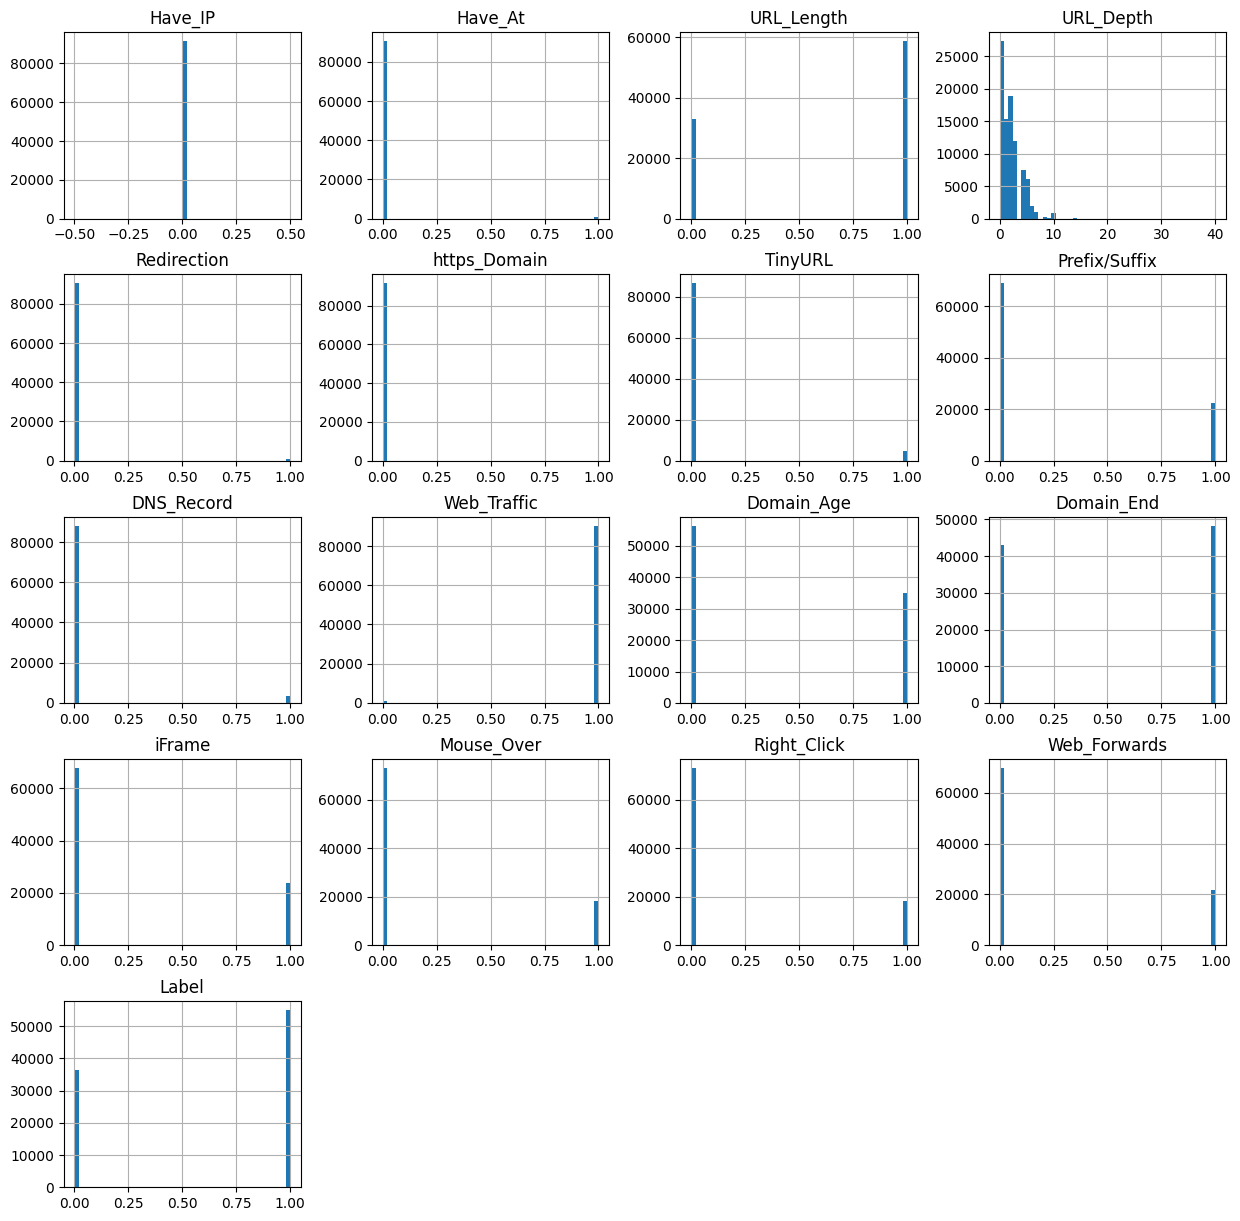

In [7]:
#Plotting the data distribution
data0.hist(bins = 50,figsize = (15,15))
plt.show()

# Correlation heatmap

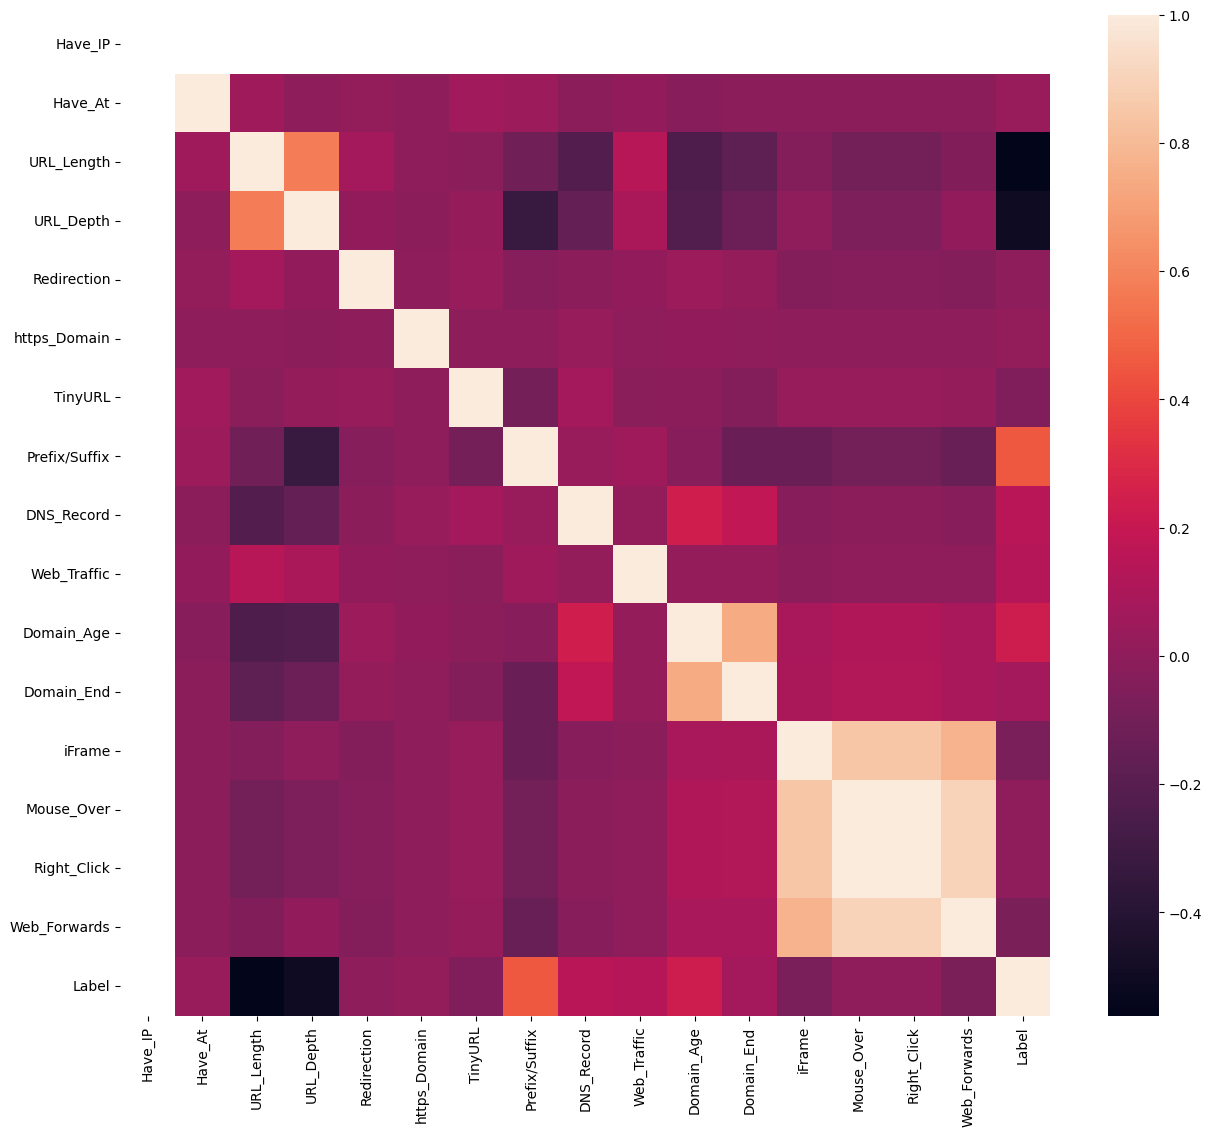

In [8]:
# Identify non-numeric columns
non_numeric_columns = data0.select_dtypes(exclude=['float', 'int']).columns

# Exclude non-numeric columns from correlation calculation
numeric_data = data0.drop(columns=non_numeric_columns)

# Calculate correlation heatmap
plt.figure(figsize=(15, 13))
sns.heatmap(numeric_data.corr())
plt.show()


In [9]:
data0.describe()

,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
count,91468.0,91468.000000,91468.000000,91468.000000,91468.000000,91468.000000,91468.000000,91468.000000,91468.000000,91468.000000,91468.000000,91468.000000,91468.000000,91468.000000,91468.000000,91468.000000,91468.000000
mean,0.0,0.009391,0.641208,1.989931,0.011917,0.000284,0.054041,0.246370,0.035357,0.989100,0.382199,0.528644,0.258156,0.198703,0.198703,0.235809,0.602331
std,0.0,0.096453,0.479649,2.021087,0.108512,0.016857,0.226099,0.430899,0.184681,0.103833,0.485928,0.499182,0.437623,0.399026,0.399026,0.424506,0.489419
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.0,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.0,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,0.0,1.000000,1.000000,40.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
#Dropping the Domain column
data = data0.drop(['Domain'], axis = 1).copy()

In [11]:
#checking the data for null or missing values
data.isnull().sum()

Have_IP          0
Have_At          0
URL_Length       0
URL_Depth        0
Redirection      0
https_Domain     0
TinyURL          0
Prefix/Suffix    0
DNS_Record       0
Web_Traffic      0
Domain_Age       0
Domain_End       0
iFrame           0
Mouse_Over       0
Right_Click      0
Web_Forwards     0
Label            0
dtype: int64

In [12]:
# shuffling the rows in the dataset so that when splitting the train and test set are equally distributed
data = data.sample(frac=1).reset_index(drop=True)
data.head()

,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,0,0,1,3,0,0,0,0,0,1,0,0,0,0,0,0,1
1,0,0,1,4,0,0,0,0,0,1,1,1,0,0,0,0,0
2,0,0,1,6,0,0,0,0,0,1,0,1,0,0,0,0,0
3,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1
4,0,0,1,4,0,0,0,0,0,1,0,0,0,0,0,0,0


In [13]:
# Splitting the data into testing and training sets
y = data['Label']
X = data.drop('Label',axis=1)
X.shape, y.shape

((91468, 16), (91468,))

Splitting the dataset into train and test sets: 80-20 split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, random_state = 12)
X_train.shape, X_test.shape

((73174, 16), (18294, 16))

In [16]:
# Creating holders to store the model performance results
ML_Model = []
acc_train = []
acc_test = []

#function to call for storing the results
def storeResults(model, a,b):
  ML_Model.append(model)
  acc_train.append(round(a, 3))
  acc_test.append(round(b, 3))

# Decision Tree Model

In [17]:
tree = DecisionTreeClassifier(max_depth = 5)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [18]:
y_test_tree = tree.predict(X_test)
y_train_tree = tree.predict(X_train)

**Performance Evaluation:**

In [19]:
acc_train_tree = accuracy_score(y_train,y_train_tree)
acc_test_tree = accuracy_score(y_test,y_test_tree)

print("Decision Tree: Accuracy on training Data: {:.3f}".format(acc_train_tree))
print("Decision Tree: Accuracy on test Data: {:.3f}".format(acc_test_tree))

Decision Tree: Accuracy on training Data: 0.892
Decision Tree: Accuracy on test Data: 0.893


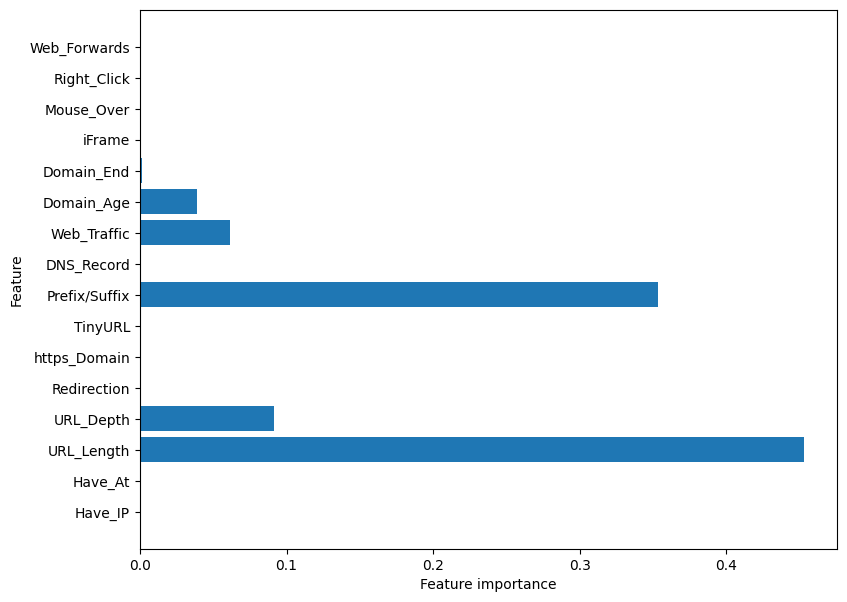

In [20]:
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), tree.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

**Storing the results:**

In [21]:
storeResults('Decision Tree', acc_train_tree, acc_test_tree)

# Random Forest Model

In [22]:
forest = RandomForestClassifier(max_depth=5)
forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=5)

In [23]:
y_test_forest = forest.predict(X_test)
y_train_forest = forest.predict(X_train)

**Performance Evaluation:**

In [24]:
acc_train_forest = accuracy_score(y_train,y_train_forest)
acc_test_forest = accuracy_score(y_test,y_test_forest)

print("Random forest: Accuracy on training Data: {:.3f}".format(acc_train_forest))
print("Random forest: Accuracy on test Data: {:.3f}".format(acc_test_forest))

Random forest: Accuracy on training Data: 0.887
Random forest: Accuracy on test Data: 0.889


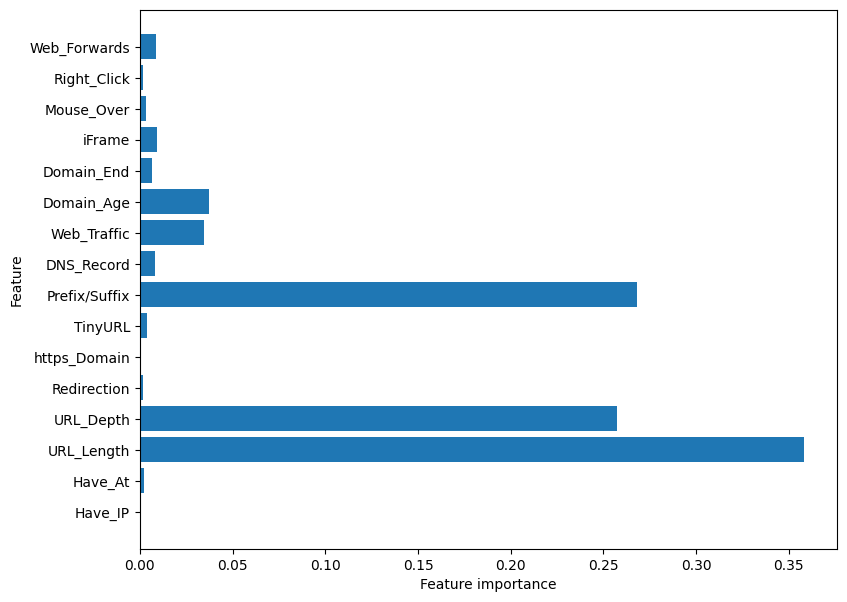

In [25]:
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), forest.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

**Storing the results:**

In [26]:
storeResults('Random Forest', acc_train_forest, acc_test_forest)

# MultiLayer Perceptrons (MLP) Model

In [27]:
mlp = MLPClassifier(alpha=0.001, hidden_layer_sizes=([100,100,100]))

mlp.fit(X_train, y_train)

MLPClassifier(alpha=0.001, hidden_layer_sizes=[100, 100, 100])

In [28]:
y_test_mlp = mlp.predict(X_test)
y_train_mlp = mlp.predict(X_train)

**Performance Evaluation:**

In [29]:
acc_train_mlp = accuracy_score(y_train,y_train_mlp)
acc_test_mlp = accuracy_score(y_test,y_test_mlp)

print("Multilayer Perceptrons: Accuracy on training Data: {:.3f}".format(acc_train_mlp))
print("Multilayer Perceptrons: Accuracy on test Data: {:.3f}".format(acc_test_mlp))

Multilayer Perceptrons: Accuracy on training Data: 0.919
Multilayer Perceptrons: Accuracy on test Data: 0.920


**Storing the results:**

In [30]:
storeResults('Multilayer Perceptrons', acc_train_mlp, acc_test_mlp)

# XGBoost Model

In [31]:
xgb = XGBClassifier(learning_rate=0.4,max_depth=7)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.4, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [32]:
y_test_xgb = xgb.predict(X_test)
y_train_xgb = xgb.predict(X_train)

**Performance Evaluation:**

In [33]:
acc_train_xgb = accuracy_score(y_train,y_train_xgb)
acc_test_xgb = accuracy_score(y_test,y_test_xgb)

print("XGBoost: Accuracy on training Data: {:.3f}".format(acc_train_xgb))
print("XGBoost : Accuracy on test Data: {:.3f}".format(acc_test_xgb))

XGBoost: Accuracy on training Data: 0.919
XGBoost : Accuracy on test Data: 0.920


**Storing the results:**

In [34]:
storeResults('XGBoost', acc_train_xgb, acc_test_xgb)

# Autoencoder Neural Network Model

In [36]:
input_dim = X_train.shape[1]
encoding_dim = input_dim

input_layer = Input(shape=(input_dim, ))
encoder = Dense(encoding_dim, activation="relu",
                activity_regularizer=regularizers.l1(10e-4))(input_layer)
encoder = Dense(int(encoding_dim), activation="relu")(encoder)

encoder = Dense(int(encoding_dim-2), activation="relu")(encoder)
code = Dense(int(encoding_dim-4), activation='relu')(encoder)
decoder = Dense(int(encoding_dim-2), activation='relu')(code)

decoder = Dense(int(encoding_dim), activation='relu')(encoder)
decoder = Dense(input_dim, activation='relu')(decoder)
autoencoder = Model(inputs=input_layer, outputs=decoder)
autoencoder.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 14)             │           238 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 16)             │           240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 16)             │           272 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,294 (5.05 KB)

 Trainable params: 1,294 (5.05 KB)

 Non-trainable params: 0 (0.00 B)

In [37]:
#compiling the model
autoencoder.compile(optimizer='adam',
                    loss='binary_crossentropy',
                    metrics=['accuracy'])

#Training the model
history = autoencoder.fit(X_train, X_train, epochs=10, batch_size=64, shuffle=True, validation_split=0.2) 

Epoch 1/10
915/915 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.3695 - loss: 0.8836 - val_accuracy: 0.4469 - val_loss: -0.9627
Epoch 2/10
915/915 ━━━━━━━━━━━━━━━━━━━━ 1s 861us/step - accuracy: 0.2180 - loss: -0.9940 - val_accuracy: 0.1514 - val_loss: -1.0752
Epoch 3/10
915/915 ━━━━━━━━━━━━━━━━━━━━ 1s 864us/step - accuracy: 0.1233 - loss: -1.0339 - val_accuracy: 0.1479 - val_loss: -1.0825
Epoch 4/10
915/915 ━━━━━━━━━━━━━━━━━━━━ 1s 882us/step - accuracy: 0.1473 - loss: -1.0872 - val_accuracy: 0.1620 - val_loss: -1.1183
Epoch 5/10
915/915 ━━━━━━━━━━━━━━━━━━━━ 1s 854us/step - accuracy: 0.1410 - loss: -1.1138 - val_accuracy: 0.0577 - val_loss: -1.1338
Epoch 6/10
915/915 ━━━━━━━━━━━━━━━━━━━━ 1s 854us/step - accuracy: 0.0712 - loss: -1.1135 - val_accuracy: 0.0481 - val_loss: -1.1483
Epoch 7/10
915/915 ━━━━━━━━━━━━━━━━━━━━ 1s 870us/step - accuracy: 0.0572 - loss: -1.1466 - val_accuracy: 0.0424 - val_loss: -1.1625
Epoch 8/10
915/915 ━━━━━━━━━━━━━━━━━━━━ 1s 876us/step - accuracy: 0.0531 - loss

**Performance Evaluation:**

In [38]:
acc_train_auto = autoencoder.evaluate(X_train, X_train)[1]
acc_test_auto = autoencoder.evaluate(X_test, X_test)[1]

print('\nAutoencoder: Accuracy on training Data: {:.3f}' .format(acc_train_auto))
print('Autoencoder: Accuracy on test Data: {:.3f}' .format(acc_test_auto))

2287/2287 ━━━━━━━━━━━━━━━━━━━━ 1s 526us/step - accuracy: 0.0377 - loss: -1.1902
572/572 ━━━━━━━━━━━━━━━━━━━━ 0s 506us/step - accuracy: 0.0403 - loss: -1.2007

Autoencoder: Accuracy on training Data: 0.038
Autoencoder: Accuracy on test Data: 0.038


**Storing the results:**

In [39]:
storeResults('AutoEncoder', acc_train_auto, acc_test_auto)

# SVM Model

In [40]:
svm = SVC(kernel='linear', C=1.0, random_state=12)

svm.fit(X_train, y_train)

SVC(kernel='linear', random_state=12)

In [41]:
y_test_svm = svm.predict(X_test)
y_train_svm = svm.predict(X_train)

**Performance Evaluation:**

In [42]:
acc_train_svm = accuracy_score(y_train,y_train_svm)
acc_test_svm = accuracy_score(y_test,y_test_svm)

print("SVM: Accuracy on training Data: {:.3f}".format(acc_train_svm))
print("SVM : Accuracy on test Data: {:.3f}".format(acc_test_svm))

SVM: Accuracy on training Data: 0.878
SVM : Accuracy on test Data: 0.877


**Storing the results:**

In [43]:
storeResults('SVM', acc_train_svm, acc_test_svm)

# Results of all models

In [45]:
results = pd.DataFrame({ 'ML Model': ML_Model,    
    'Train Accuracy': acc_train,
    'Test Accuracy': acc_test})
results.sort_values(by=['Test Accuracy', 'Train Accuracy'], ascending=False)

,ML Model,Train Accuracy,Test Accuracy
2,Multilayer Perceptrons,0.919,0.920
3,XGBoost,0.919,0.920
0,Decision Tree,0.892,0.893
1,Random Forest,0.887,0.889
5,SVM,0.878,0.877
4,AutoEncoder,0.038,0.038


# Saving models

In [46]:
import pickle
pickle.dump(xgb, open("XGBoostClassifierMAXWithWebTraffic.pickle.dat", "wb"))

In [47]:
# load model from file
loaded_model = pickle.load(open("XGBoostClassifierMAXWithWebTraffic.pickle.dat", "rb"))
loaded_model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.4, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)